In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TOP_SECRET")
project = rf.workspace("raflidzaky").project("cat-detection-jffqx")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cat-detection-2 in yolov8:: 100%|██████████| 110/110 [00:00<00:00, 9172.98it/s]


In [ ]:
!nvidia-smi

Sun Jan  5 00:27:41 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os

# To ease management of path
# HOME as helper variable (ga perlu ketik panjang2)
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 58.6 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()
!yolo checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.7/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
# Cek model
%cd {HOME}

!yolo task=detect mode=predict model=yolov8n.pt source='/content/GaaSoIqWwAAdgYa.jpg'

/content
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/GaaSoIqWwAAdgYa.jpg: 640x640 1 cat, 7.9ms
Speed: 11.8ms preprocess, 7.9ms inference, 780.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import os
os.listdir('runs/detect/predict3')

['suggested-1VczngbUnqTSBIPHDTlp_jpg.rf.08fc67deaabbddfa96a18f93cf356be1.jpg']

/content


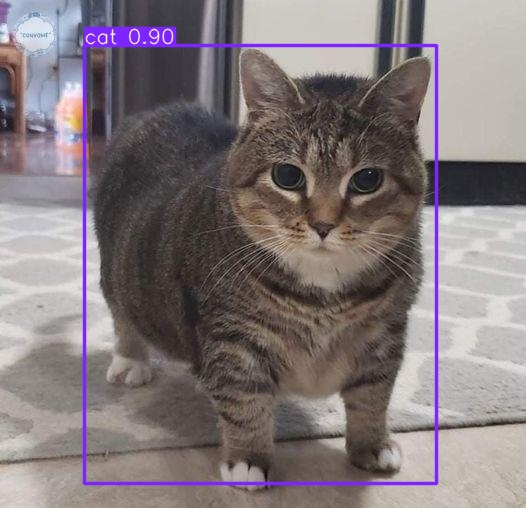

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/GaaSoIqWwAAdgYa.jpg')

# Custom Training

In [ ]:
# No need to wrap as a list
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=400 augment=True freeze=conv,block

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/cat-detection-2/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=conv,block, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

SEVERAL ANALYSIS:
1. Box loss menurun dari epoch ke epoch (1.53 ke 1.26). Menandakan model mampu memberi box secara tepat (ini penghitungannya menggunakan x, y, width, height)
2. Class (cls) loss menurun dari epoch ke epoch (2.609 ke 1.428) menandakan model mampu memberikan label/class secara tepat.
3. Distributive Focal Loss: Stabil. Model belum mampu menurunkan "uncertainty" dari localization.
4. mAP50 tinggi, mAP50-95 rendah: menandakan model belum pede atau gak bisa untuk predict difficult task.



Problematika paling berat di object detection adalah untuk FOKUS. Sebelumnya, basic computer vision sudah memiliki a focused picture, no multiple objects. Dengan gambar yang terfokus itu, PR-nya tinggal memberi label. Deep learning tries to predict the label.

Tetapi, bagaimana dengan object detection yang multiple objects? Tentu harus fokus ke objek mana dan labelnya apa. Permasalahan labels diukur dengan horsemen of metrics: accuracy, precision, recall (terdapat tambahan seperti mAP - rerata presisi).

Namun, bagaimana model mampu memfokuskan ke objek yang tepat? Di sinilah model harus melakukan localization (menggambar box) -> predict its label.

Menggambar box ada challenge-nya tersendiri:
1. Bagaimana model bisa membedakan suatu objek interest dari objek lainnya? (predict label -> localization or localization -> predict label?)
2. Bagaimana model bisa menggambar dengan tepat (ga kekecilan dan kebesaran?)

Untuk bisa membedakan/distinguish suatu objek dengan objek lain hingga membedakan ke level pixel yang "sulit" (warna gak jelas dan overlap antara objek-objek), digunakanlah Distributive Focal Loss. Dia berupaya mempelajari distribusi probabilitas "fokus" dari ground truth (annotated picts) dan memprediksinya. Distribusinya mencakup koordinat X dan Y dari titik sentral box serta tinggi/lebar box.

Nah, untuk memprediksi ini, terdapat problem regression-like (?) untuk mempelajari fitur X, Y, tinggi, lebar agar bisa memprediksi.

Lalu, localizing ini kudu diatur threshold-nya. Tujuannya biar tau apakah model bisa tepat (1) memfokuskan objek atau justru mis-focus (0). Threshold ini bernama IoU (Intersection over Union). Union ini luas total dari kedua box (predicted dan ground truth), sedangkan intersection adalah luas interseksi mereka. If interseksi = union, maknanya mereka 100% intersect. Untuk klasifikasi apakah dia bener localizing-nya, IoU di-threshold, misalnya 50% (0.50) dan 95% (0.95).

Katakanlah suatu model bisa memprediksi dengan tepat localization box-nya (1). Tetapi ternyata labelnya salah (predicts label that is not belonging to) -> ini dikatakan false positive. Sebaliknya juga disebut false positive.

True negative ialah ketika model tau itu not belonging to a specific instance and not focusing to it.

No clear-cut measure of False Negative. Jadinya, precision lebih digunakan (even exist mAP - mean average precision). Low mAP with low IoU means kebangetan (udah threshold rendah/easy to detect, tetap gak lolos).

YOLO uses CNN as its edge detection. Gak seperti edge detection traditional (Sobel, Prewitt, & Canny algorithm yang lihat seberapa drastis perubahan pixel-nya), dia belajar sendiri menentukan pattern pixel (via Kernel dan convolution method).

CNN memiliki perlu beberapa layer untuk ekstrak fitur secara bertahap: low-level (fitur simpel dari suatu objek), intermediate (seperti warna dan tekstur), high level.

# More Training

In [ ]:
# Using transfer learning concept
# with yolov8n (nano - ultralight model)
!yolo task=detect mode=export model=yolov8n.pt

WARNING ⚠️ 'format' argument is missing. Using default 'format=torchscript'.
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 2.0s, saved as 'yolov8n.torchscript' (12.4 MB)

Export complete (2.5s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


In [ ]:
# Load the model
model = YOLO("yolov8n.pt")

# Print the model structure
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=400 augment=True freeze=conv.Conv,block.C2f,block.SPPF

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/cat-detection-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=conv.Conv,block.C2f,block.SPPF, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

Bad performance (need extensive training), tapi kapasitas generalisasinya bagus sih.